# **ABALONE AGE PREDICTION**

# **1.Importing necessary packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing.imputation import Imputer
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
#from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

# **2. Loading the dataset**

In [ ]:
data=pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# **3. Data Visualizations**
**3.1 Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


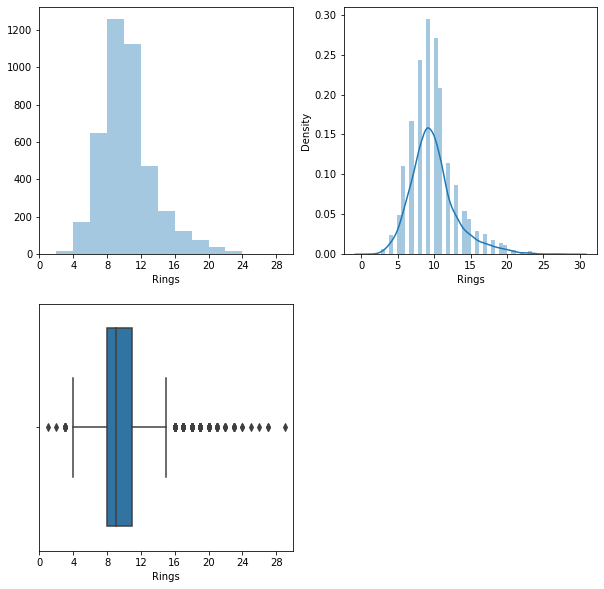

In [ ]:
rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(data['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(data['Rings'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(data['Rings'])

**3.2 Bi - Variate Analysis**

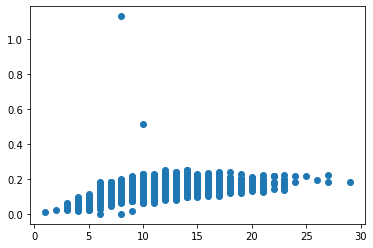

In [ ]:
plt.scatter(data.Rings, data.Height)


**3.3 Multi-Variate Analysis**


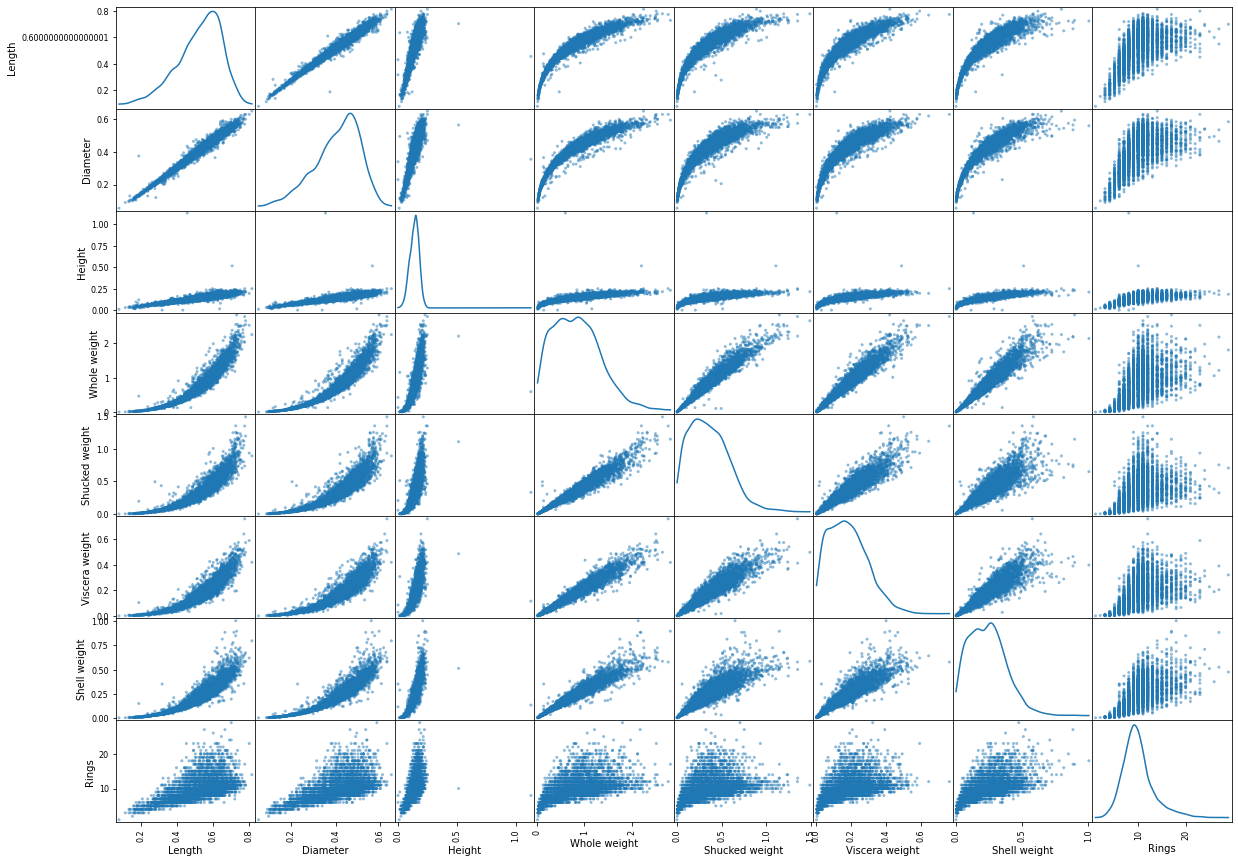

In [ ]:

pd.plotting.scatter_matrix(data.loc[:, "Sex":"Rings"], diagonal="kde",figsize=(20,15))
plt.show()

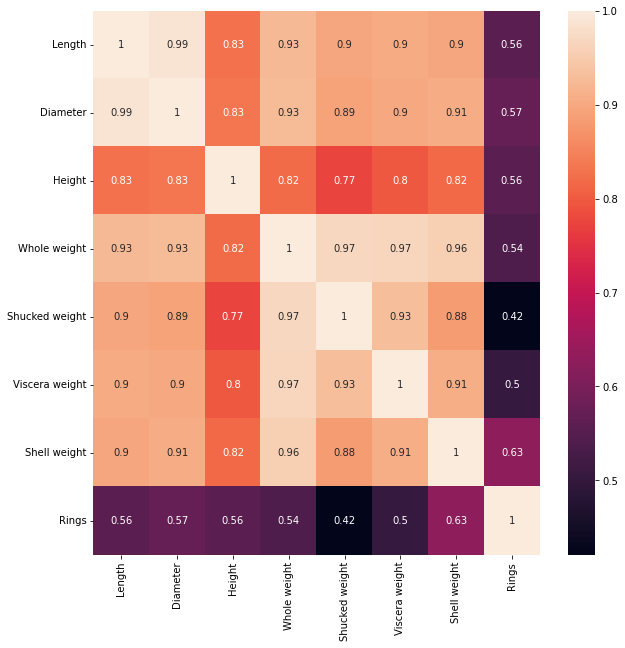

In [ ]:
plt.figure(figsize=(10, 10))
corr = data.corr()
_ = sns.heatmap(corr, annot=True)

In [ ]:
numerical_features = data.select_dtypes(include = [np.number]).columns
categorical_features = data.select_dtypes(include = [np.object]).columns
numerical_features
categorical_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Index(['Sex'], dtype='object')

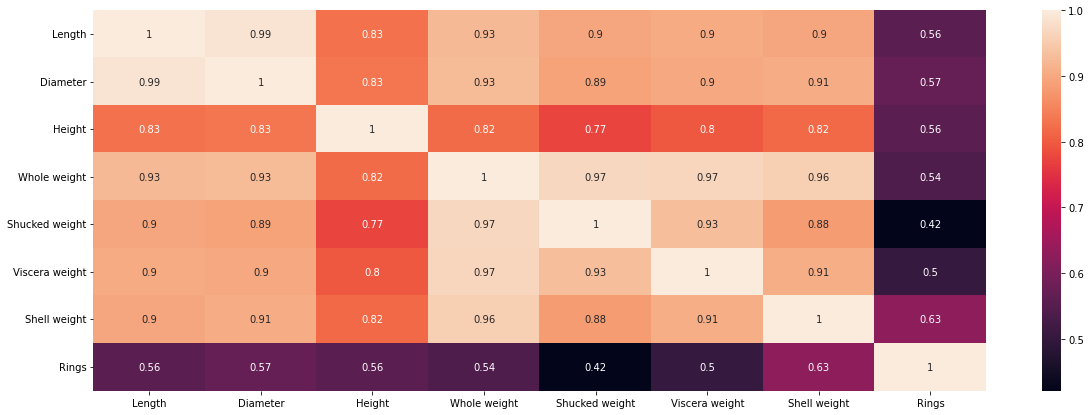

In [ ]:
plt.figure(figsize = (20,7))
sns.heatmap(data[numerical_features].corr(),annot = True)

#**4. Descriptive statistics**

In [ ]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].mean()

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [ ]:
data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].median()

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [ ]:
data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].mode()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].sum()

Length             2188.7150
Diameter           1703.7200
Height              582.7600
Whole weight       3461.6560
Shucked weight     1501.0780
Viscera weight      754.3395
Shell weight        997.5965
Rings             41493.0000
dtype: float64

In [ ]:
data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].quantile()

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
Name: 0.5, dtype: float64

In [ ]:
data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64

In [ ]:
data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].std()

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Rings             3.224169
dtype: float64

In [ ]:
data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [ ]:
data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].min()

Length            0.0750
Diameter          0.0550
Height            0.0000
Whole weight      0.0020
Shucked weight    0.0010
Viscera weight    0.0005
Shell weight      0.0015
Rings             1.0000
dtype: float64

In [ ]:
data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']].max()

Length             0.8150
Diameter           0.6500
Height             1.1300
Whole weight       2.8255
Shucked weight     1.4880
Viscera weight     0.7600
Shell weight       1.0050
Rings             29.0000
dtype: float64

# **5. Checking for Missing values**

In [ ]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# **6. Outlier analysis**

In [ ]:
data = pd.get_dummies(data)
dummy_data = data.copy()

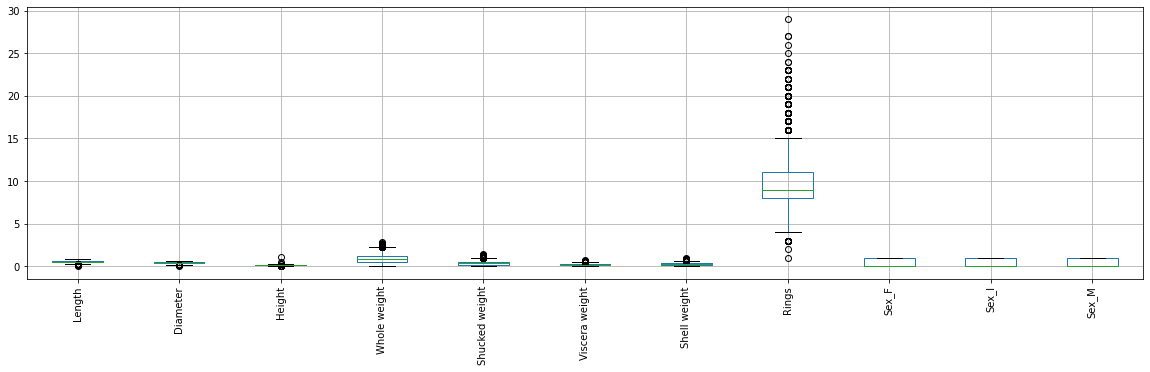

In [ ]:
data.boxplot( rot = 90, figsize=(20,5))

In [ ]:
data['age'] = data['Rings']+1.5



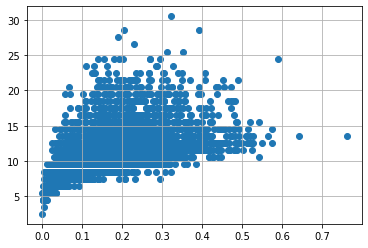

In [ ]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)

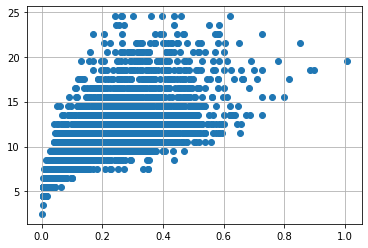

In [ ]:
var = 'Shell weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Shucked weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked weight']<1) & (data['age'] > 20)].index, inplace=True)

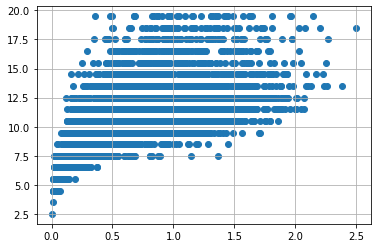

In [ ]:
var = 'Whole weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Whole weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['age'] > 25)].index, inplace=True)

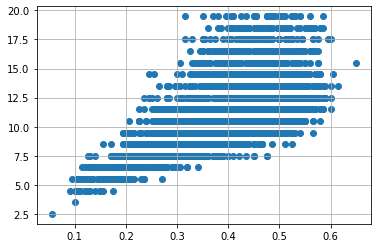

In [ ]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

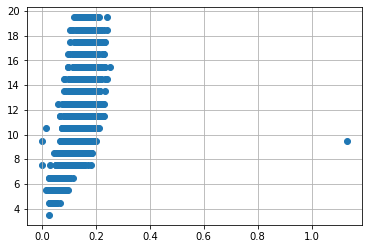

In [ ]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

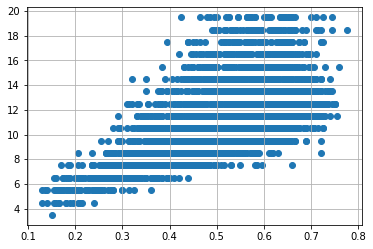

In [ ]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)

# **7. Checking for Categorical columns and perform encoding**

In [ ]:
from scipy import stats
z= np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
print(z)

        Length  Diameter    Height  Whole weight  Shucked weight  \
0     0.544555  0.399071  1.128902      0.620330        0.594508   
1     1.433400  1.424312  1.261866      1.247197        1.198628   
2     0.090335  0.164811  0.065193      0.266155        0.439854   
3     0.671532  0.399071  0.331120      0.615984        0.638005   
4     1.602703  1.526836  1.527793      1.291740        1.246958   
...        ...       ...       ...           ...             ...   
4172  0.386616  0.472383  0.732590      0.190143        0.108688   
4173  0.598246  0.369859  0.065193      0.361798        0.442162   
4174  0.682898  0.728693  1.796299      0.818097        0.860213   
4175  0.894528  0.831217  0.333699      0.641009        0.886794   
4176  1.614069  1.548885  1.530372      2.496623        2.890056   

      Viscera weight  Shell weight     Rings     Sex_F     Sex_I     Sex_M  \
0           0.711684      0.611842  1.908736  0.666846  0.704866  1.332557   
1           1.217824      1

In [ ]:
data_o = data[(z < 3).all(axis=1)]

In [ ]:
low_cardinality_cols = [cname for cname in data_o.columns if
                        data_o[cname].nunique() < 10 and 
                       data_o[cname].dtype == "object"]
numeric_cols = [cname for cname in data_o.columns if
                                 data_o[cname].dtype in ['int64','float64']]

my_cols = low_cardinality_cols + numeric_cols
data_predictors = data_o[my_cols]

In [ ]:
print("Shape of Abalones with outliers: "+ str(data.shape) , 
      "Shape of Abalones without outliers: " + str(data_o.shape))

Shape of Abalones with outliers: (4022, 12) Shape of Abalones without outliers: (3973, 12)


In [ ]:
data_encoded_predictors = pd.get_dummies(data_predictors)

# **8. Spliting the dataset into dependent and independent variables**

In [ ]:
x= data.iloc[:,3:-1]
y=data.iloc[:,-1]
x.head()

,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [ ]:
x = data.iloc[:, 3:13].values
y = data.iloc[:, 3:13].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3016, 9)
(3016, 9)
(1006, 9)
(1006, 9)


# **9. Scaling independent variables**


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8
0,-0.769217,-0.763992,-0.861091,-0.660073,0.846424,-0.681232,1.429472,-0.740979,0.846424
1,-1.469024,-1.471684,-1.374250,-1.431125,-0.236960,-0.681232,-0.699559,1.349566,-0.236960
2,1.559468,1.118323,2.275953,1.210298,1.929808,-0.681232,-0.699559,1.349566,1.929808
3,1.245047,1.254511,1.399711,1.248469,0.846424,-0.681232,-0.699559,1.349566,0.846424
4,0.546332,0.213645,1.554627,0.408710,0.846424,1.467928,-0.699559,-0.740979,0.846424


# **10. Spliting training and testing data**

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3016
Test data points : 1006


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3016, 9)
(3016, 9)
(1006, 9)
(1006, 9)


# **11. Building the Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_jobs=-1, #n_jobs=-1 means that we are using all computer power to fit the model
                           random_state=14)

# fit the model
rf.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
models = {'linear_regression':LinearRegression(),
         
         'lasso':Lasso(random_state=1),
         
         'decision_tree':DecisionTreeRegressor(random_state=1),
         
         'random_forest':RandomForestRegressor(random_state=1),
         
         'xgboost':XGBRegressor(random_state=1),
        }

In [ ]:
rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=200,
                      random_state=1)

# **12. Training the Model**

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
train_X,val_X,train_y,val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print("Shape of Training X :",train_X.shape)
print("Shape of Validation X :",val_X.shape)
print("Shape of Training y :",train_y.shape)
print("Shape of Validation y :",val_y.shape)

Shape of Training X : (3217, 11)
Shape of Validation X : (805, 11)
Shape of Training y : (3217,)
Shape of Validation y : (805,)


In [ ]:
lr = LinearRegression()
lr.fit(train_X,train_y)
print('Attempting to fit Linear Regressor')

Attempting to fit Linear Regressor


In [ ]:
%%time
y_pred_val_lr = lr.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lr))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lr))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lr)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print("\n")

MAE on Validation set : 1.1546319456101628e-15


MSE on Validation set : 3.1821472974893545e-30


RMSE on Validation set : 3.397987559733206e-08


R2 Score on Validation set : 1.0


CPU times: user 6.83 ms, sys: 4.96 ms, total: 11.8 ms
Wall time: 12.7 ms


# **13. Testing the Model**

In [ ]:
import numpy as np
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)
x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343566


# **14. Performance Metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

# create an evaluation function
def show_score(model):
  train_preds= model.predict(x_train)
  test_preds = model.predict(x_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores
# fit 

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [ ]:
show_score(rf)

{'Training MAE': 0.002969515362511056,
 'Test MAE': 0.008333732052131658,
 'Training MSE': 3.377316030763978e-05,
 'Test MSE': 0.00022606804480543698,
 'Training RMSE': 0.0058114679993646855,
 'Test RMSE': 0.015035559344614919,
 'Training R2': 0.9977286616319563,
 'Test R2': 0.984112781560057}